In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 1. Data Preparation and Convolutional Networks Construction

In [0]:
# Import library 
# defining original data path from kaggle and create another directory stored smaller data from orginals

import os, shutil


base_dir = '/content/gdrive/My Drive/cats_and_dogs_small'

# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validation')
# test_dir = os.path.join(base_dir, 'test')



In [3]:
cd /content/drive/My Drive/cats_and_dogs_small

/content/drive/My Drive/cats_and_dogs_small


In [4]:
ls

test/  train/  validation/


In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # using 'sigmoid' in the last layer because of binary classification

Using TensorFlow backend.


In [0]:
from keras import optimizers

# Copiling using binary crossentropy as a loss function and optimizing using RMSprop
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr = 1e-4), metrics=['acc'])

## 2. Data Preprocessing
    There are 4 steps before getting into the network as follow:
    1. Read the picture files
    2. Decode the JPEG content to RGB grids of pixels
    3. Convert these into floating-point tensors
    4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval
       because NN prefer to deal with small input values

In [7]:
# Using ImageDataGenerator to read images from directories 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1.0/255)
test_datagen = ImageDataGenerator(rescale= 1.0/255)

train_generator = train_datagen.flow_from_directory('train', target_size=(150, 150),
                                                   batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory('validation', target_size=(150, 150),
                                                       batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


In [0]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, 
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 2080s 21s/step - loss: 0.6867 - acc: 0.5385 - val_loss: 0.6596 - val_acc: 0.6330
Epoch 2/30
100/100 [==============================] - 2248s 22s/step - loss: 0.6499 - acc: 0.6120 - val_loss: 0.6370 - val_acc: 0.6420
Epoch 3/30
100/100 [==============================] - 3606s 36s/step - loss: 0.5987 - acc: 0.6745 - val_loss: 0.6411 - val_acc: 0.6380
Epoch 4/30
100/100 [==============================] - 6604s 66s/step - loss: 0.5608 - acc: 0.7065 - val_loss: 0.6129 - val_acc: 0.6500
Epoch 5/30
100/100 [==============================] - 2400s 24s/step - loss: 0.5223 - acc: 0.7390 - val_loss: 0.6030 - val_acc: 0.6690
Epoch 6/30
100/100 [==============================] - 2157s 22s/step - loss: 0.4947 - acc: 0.7450 - val_loss: 0.5879 - val_acc: 0.6900
Epoch 7/30
100/100 [==============================] - 2165s 22s/step - loss: 0.4725 - acc: 0.7695 - val_loss: 0.5746 - val_acc: 0.7040
Epoch 8/30
100/100 [==============================] - 2

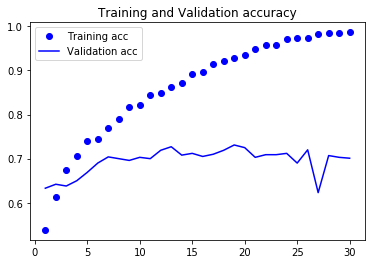

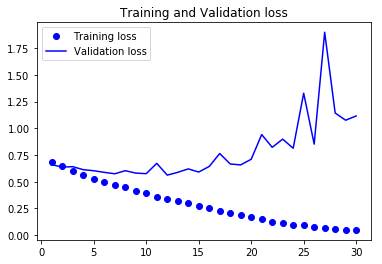

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [0]:
model.save('cats_and_dogs_small.h5')

# Data Augmentation

In [0]:
# Using ImageDataGenerator for data augmentation


datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')


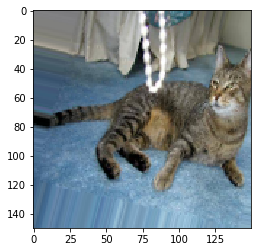

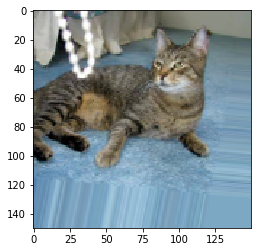

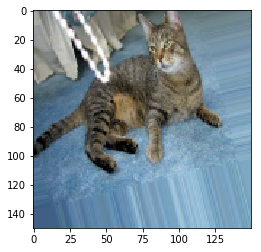

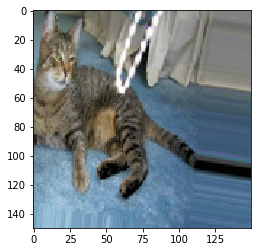

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt


fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)  # Converts it to a Numpy array with shape (150, 150, 3)
x = x.reshape((1, ) + x.shape) # Reshape it to (1, 150, 150, 3)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4==0:
        break
plt.show()
    

In [0]:
# Defining a new convnet that includes dropout 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))    # Dropout = 0.5, which means shutting neuron off 50% randomly in Flatten layer
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                  height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('train', target_size=(150, 150),
                                                   batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory('validation', target_size=(150, 150),
                                                   batch_size=32, class_mode='binary')
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                             validation_data=validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 710s 7s/step - loss: 0.6938 - acc: 0.5110 - val_loss: 0.7020 - val_acc: 0.5019
Epoch 2/100
100/100 [==============================] - 29s 292ms/step - loss: 0.6871 - acc: 0.5458 - val_loss: 0.7421 - val_acc: 0.5235
Epoch 3/100
100/100 [==============================] - 29s 289ms/step - loss: 0.6784 - acc: 0.5710 - val_loss: 0.6747 - val_acc: 0.6267
Epoch 4/100
100/100 [==============================] - 29s 293ms/step - loss: 0.6614 - acc: 0.6118 - val_loss: 0.6104 - val_acc: 0.6393
Epoch 5/100
100/100 [==============================] - 28s 282ms/step - loss: 0.6529 - acc: 0.6054 - val_loss: 0.6073 - val_acc: 0.5952
Epoch 6/100
100/100 [==============================] - 32s 319ms/step - loss: 0.6375 - acc: 0.6300 - val_loss: 0.6818 - val_acc: 0.6050
Epoch 7/100
100/100 [==============================] - 30s 296ms/step - loss: 0.6291 - acc: 0.6446 - v

In [0]:
model.save('cats_and_dogs_small_2.h5')

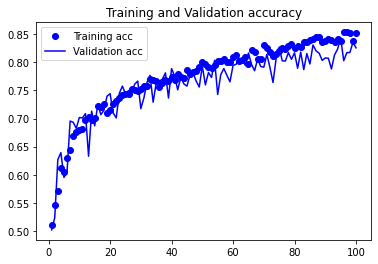

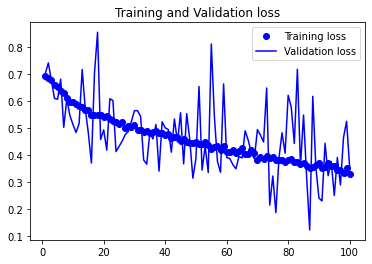

In [13]:
# plotting 'Training and Validation accuray' and 'Training and Validation loss' agian
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()
# Now, as you can see that there is no longer overfitting 
# because the training curves are closely tracking along the validation curves

# Comparing with  a pretrained Convnet 

## 1. Feature Extraction
### using VGG16 trained on ImageNet dataset to extract interesting features from cat and dog images

In [14]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [15]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### 1.1 Fast Feature Extraction without Data Augmentation

In [17]:
import numpy as np

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), 
                                           batch_size=batch_size, class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size: (i+1)*batch_size] = labels_batch
        i +=1
        if i*batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features('train', 2000)
validation_features, validation_labels = extract_features('validation', 1000)
test_features, test_labels = extract_features('test', 1000)

Found 2000 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [19]:
## Defining and training the densely connected classifier
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_features, train_labels, epochs=30, batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 284us/step - loss: 0.5910 - acc: 0.6845 - val_loss: 0.4241 - val_acc: 0.8380
Epoch 2/30
2000/2000 [==============================] - 0s 231us/step - loss: 0.4074 - acc: 0.8190 - val_loss: 0.3463 - val_acc: 0.8760
Epoch 3/30
2000/2000 [==============================] - 0s 238us/step - loss: 0.3428 - acc: 0.8605 - val_loss: 0.3102 - val_acc: 0.8860
Epoch 4/30
2000/2000 [==============================] - 0s 238us/step - loss: 0.3029 - acc: 0.8770 - val_loss: 0.2882 - val_acc: 0.8950
Epoch 5/30
2000/2000 [==============================] - 0s 232us/step - loss: 0.2766 - acc: 0.8875 - val_loss: 0.2743 - val_acc: 0.8970
Epoch 6/30
2000/2000 [==============================] - 0s 230us/step - loss: 0.2583 - acc: 0.9005 - val_loss: 0.2669 - val_acc: 0.9010
Epoch 7/30
2000/2000 [==============================] - 0s 234us/step - loss: 0.2463 - acc: 0.9010 - val_loss: 0.2728 - val_acc: 0.8900


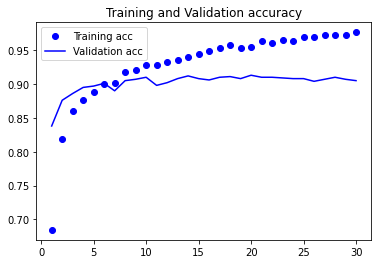

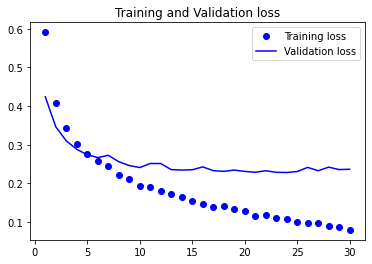

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()
## As you can see that accuracy reach about 90% (much better), 
#  but the graph also indicate the Overfitting even using dropout because this technique doesn't use data augmentation

### 1.2  Feature Extraction with Data Augmentation (very expensive and intractalbe on CPU)

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [23]:
print('This is the number of trainable weights'
     'before freezing the conv base: ', len(model.trainable_weights))

This is the number of trainable weightsbefore freezing the conv base:  30


In [0]:
conv_base.trainable = False

In [25]:
print('This is the number of trainable weights'
     'after freezing the conv base: ', len(model.trainable_weights))

This is the number of trainable weightsafter freezing the conv base:  4


In [27]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                  shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_dataten = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('train', target_size=(150, 150),
                                                   batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory('validation', target_size=(150, 150),
                                                   batch_size=20, class_mode='binary')
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                             validation_data=validation_generator, validation_steps=50)                                  

Found 2000 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 22s 220ms/step - loss: 0.5906 - acc: 0.6885 - val_loss: 0.5156 - val_acc: 0.8420
Epoch 2/30
100/100 [==============================] - 21s 206ms/step - loss: 0.4757 - acc: 0.7875 - val_loss: 0.4463 - val_acc: 0.8667
Epoch 3/30
100/100 [==============================] - 20s 202ms/step - loss: 0.4262 - acc: 0.8130 - val_loss: 0.1953 - val_acc: 0.8879
Epoch 4/30
100/100 [==============================] - 20s 204ms/step - loss: 0.3988 - acc: 0.8320 - val_loss: 0.5301 - val_acc: 0.8798
Epoch 5/30
100/100 [==============================] - 20s 201ms/step - loss: 0.3757 - acc: 0.8380 - val_loss: 0.2908 - val_acc: 0.8949
Epoch 6/30
100/100 [==============================] - 20s 201ms/step - loss: 0.3743 - acc: 0.8295 - val_loss: 0.2503 - val_acc: 0.8899
Epoch 7/30
100/100 [==============================] - 21s 206ms/step - loss: 0.3558 - acc: 0.8355 - val_lo

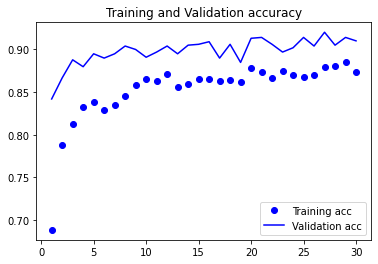

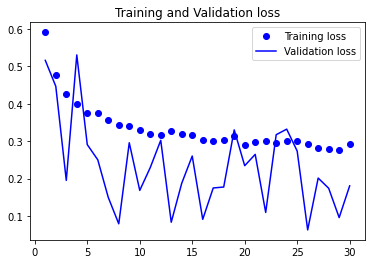

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()
# As you can see that validation accuracy reach about 96% 
# and the overfitting is mitigated much better than without data augmentation


# Fine-Tuning
## The Steps for fine-tuning a network are as follow:
### 1. Add your custom network on top of an already-trained base network
### 2. Freeze the base network
### 3. Train the part you added
### 4. Unfreeze some layers in the base network
### 5. Jointly train both these layers and the part you added
###  *** The first 3 steps are already completed when doing feature extraction, therefore we start with the 4th step

In [30]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
# The Code above allow only 'block5_conv1' from conv_base and the top layers to be trainable

In [32]:
# let's begin  fine-tuning the network
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                             validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 23s 230ms/step - loss: 0.2850 - acc: 0.8710 - val_loss: 0.5225 - val_acc: 0.9130
Epoch 2/100
100/100 [==============================] - 21s 215ms/step - loss: 0.2526 - acc: 0.8845 - val_loss: 0.1192 - val_acc: 0.9091
Epoch 3/100
100/100 [==============================] - 22s 216ms/step - loss: 0.2391 - acc: 0.8980 - val_loss: 0.2153 - val_acc: 0.8818
Epoch 4/100
100/100 [==============================] - 21s 213ms/step - loss: 0.2198 - acc: 0.9055 - val_loss: 0.0605 - val_acc: 0.9263
Epoch 5/100
100/100 [==============================] - 21s 211ms/step - loss: 0.2101 - acc: 0.9145 - val_loss: 0.1789 - val_acc: 0.9232
Epoch 6/100
100/100 [==============================] - 21s 208ms/step - loss: 0.2096 - acc: 0.9125 - val_loss: 0.1807 - val_acc: 0.9283
Epoch 7/100
100/100 [==============================] - 21s 210ms/step - loss: 0.1917 - acc: 0.9185 - val_loss: 0.1703 - val_acc: 0.9232
Epoch 8/100
100/100 [===========================

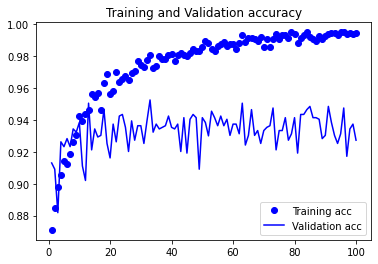

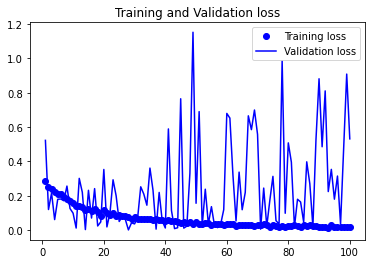

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [34]:
test_generator = test_datagen.flow_from_directory('test', target_size=(150, 150), batch_size=20, class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc: ', test_acc)

Found 1000 images belonging to 2 classes.
test acc:  0.9259999990463257
